In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/HCLTECH.csv')

In [4]:
# Display the first few rows of the dataset
print(df.head())

         Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0  2000-01-11  HCLTECH     EQ      580.00  1550.0  1725.00  1492.00  1560.00   
1  2000-01-12  HCLTECH     EQ     1554.45  1560.0  1678.85  1560.00  1678.85   
2  2000-01-13  HCLTECH     EQ     1678.85  1790.0  1813.20  1781.00  1813.20   
3  2000-01-14  HCLTECH     EQ     1813.20  1958.3  1958.30  1835.00  1958.30   
4  2000-01-17  HCLTECH     EQ     1958.30  2115.0  2115.00  1801.65  1801.65   

     Close     VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  1554.45  1582.72  1192200  1.886915e+14     NaN                 NaN   
1  1678.85  1657.05   344850  5.714349e+13     NaN                 NaN   
2  1813.20  1804.69    53000  9.564880e+12     NaN                 NaN   
3  1958.30  1939.90   270950  5.256169e+13     NaN                 NaN   
4  1801.65  1990.55   428800  8.535473e+13     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3     

In [5]:
# Display the summary statistics of the dataframe
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  5300.000000  5300.000000  5300.000000  5300.000000  5300.000000   
mean    642.113802   643.018887   654.269217   630.466274   642.240547   
std     411.660337   413.208429   420.237830   404.336086   411.739377   
min      89.700000    87.100000    94.750000    86.650000    89.000000   
25%     314.200000   315.825000   322.725000   308.050000   314.462500   
50%     535.075000   533.250000   545.000000   520.250000   535.150000   
75%     893.975000   893.425000   907.837500   882.487500   895.425000   
max    2819.150000  2825.000000  2998.000000  2760.500000  2805.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5300.000000  5300.000000  5.300000e+03  5.300000e+03    2456.000000   
mean    642.173981   642.502587  1.645121e+06  1.075213e+14   65378.973941   
std     411.674568   412.001186  2.187826e+06  1.718074e+14   47842.804142   
min      89.700000   

In [6]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5300 non-null   object 
 1   Symbol              5300 non-null   object 
 2   Series              5300 non-null   object 
 3   Prev Close          5300 non-null   float64
 4   Open                5300 non-null   float64
 5   High                5300 non-null   float64
 6   Low                 5300 non-null   float64
 7   Last                5300 non-null   float64
 8   Close               5300 non-null   float64
 9   VWAP                5300 non-null   float64
 10  Volume              5300 non-null   int64  
 11  Turnover            5300 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.2

In [8]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5295,2021-04-26,HCLTECH,EQ,955.65,940.0,954.50,923.05,930.0,928.80,931.70,19619972,1.827997e+15,311431.0,9218485.0,0.4699
5296,2021-04-27,HCLTECH,EQ,928.80,931.0,938.55,923.40,930.3,928.85,928.06,6406825,5.945938e+14,180458.0,3233276.0,0.5047
5297,2021-04-28,HCLTECH,EQ,928.85,931.2,935.85,921.75,925.9,923.80,926.63,6845677,6.343403e+14,228230.0,3890178.0,0.5683
5298,2021-04-29,HCLTECH,EQ,923.80,929.7,929.70,907.10,910.3,909.55,914.34,8588734,7.852988e+14,363122.0,4041614.0,0.4706
5299,2021-04-30,HCLTECH,EQ,909.55,905.0,915.00,895.40,900.1,898.95,904.98,10921664,9.883911e+14,465056.0,6189272.0,0.5667


In [9]:
df.shape

(5300, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [10]:
# Checking for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2844
Deliverable Volume     503
%Deliverble            503
dtype: int64


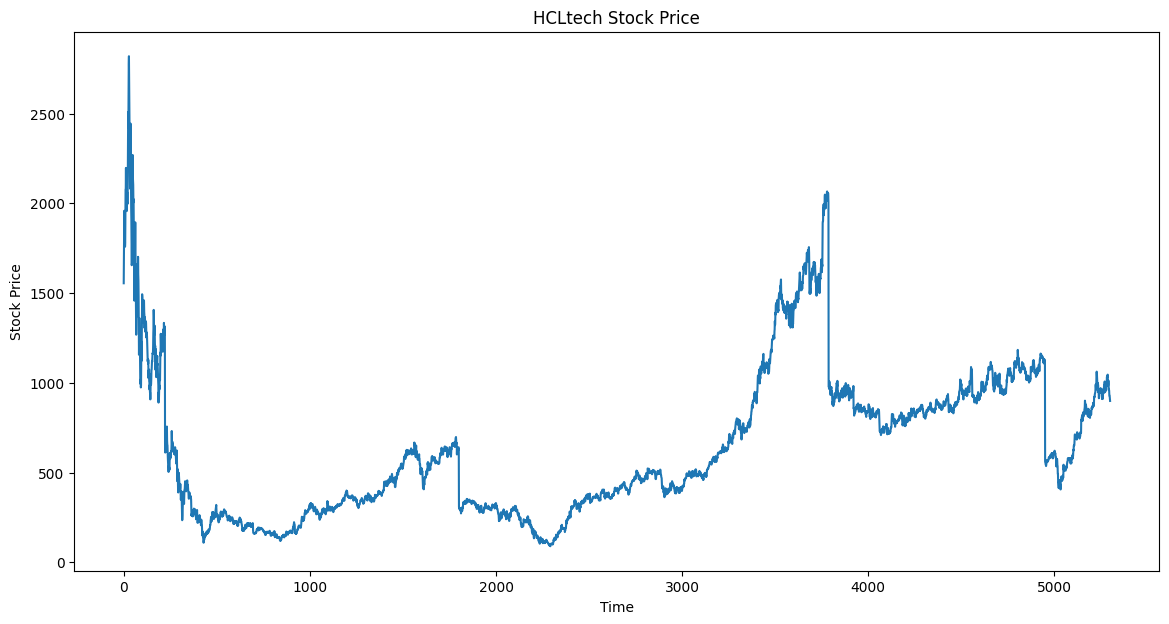

In [11]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('HCLtech Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [12]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [13]:
# Feature selection and scaling
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

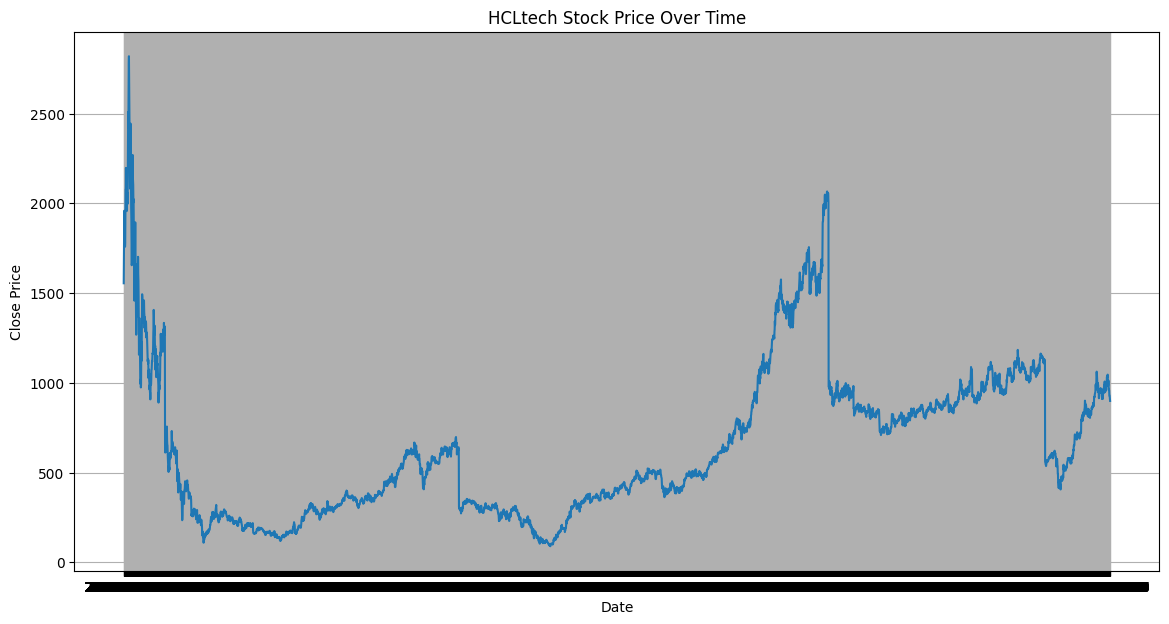

In [15]:
# Visualize the data
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'])
plt.title('HCLtech Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [17]:
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

In [18]:
# Display the missing values and summary statistics
missing_values, summary_stats

(Date                     0
 Symbol                   0
 Series                   0
 Prev Close               0
 Open                     0
 High                     0
 Low                      0
 Last                     0
 Close                    0
 VWAP                     0
 Volume                   0
 Turnover                 0
 Trades                2844
 Deliverable Volume     492
 %Deliverble            492
 dtype: int64,
         Prev Close         Open         High          Low         Last  \
 count  5300.000000  5300.000000  5300.000000  5300.000000  5300.000000   
 mean    642.113802   643.018887   654.269217   630.466274   642.240547   
 std     411.660337   413.208429   420.237830   404.336086   411.739377   
 min      89.700000    87.100000    94.750000    86.650000    89.000000   
 25%     314.200000   315.825000   322.725000   308.050000   314.462500   
 50%     535.075000   533.250000   545.000000   520.250000   535.150000   
 75%     893.975000   893.425000   907.8

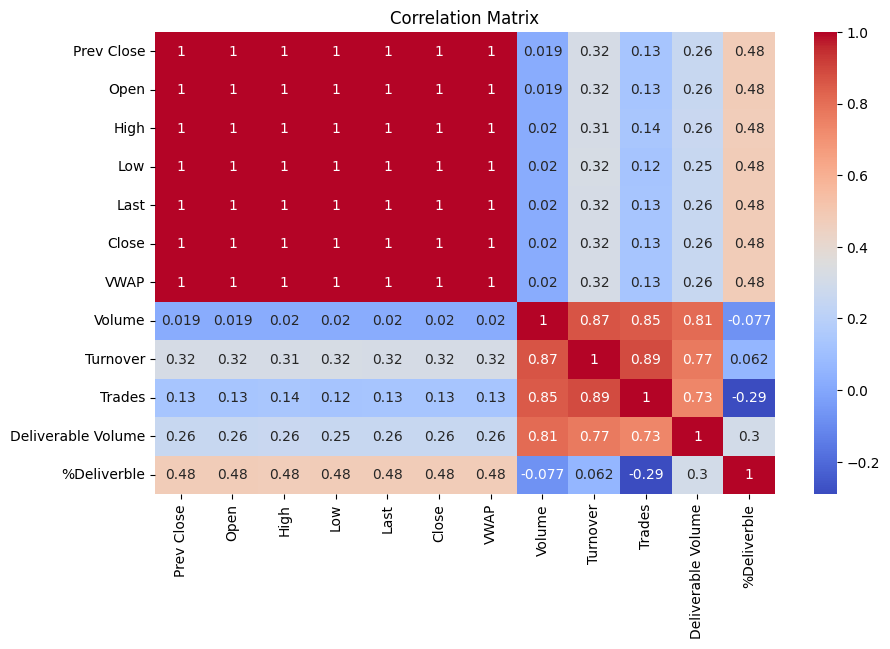

In [19]:
# Heatmap for correlation
plt.figure(figsize=(10,6))
# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

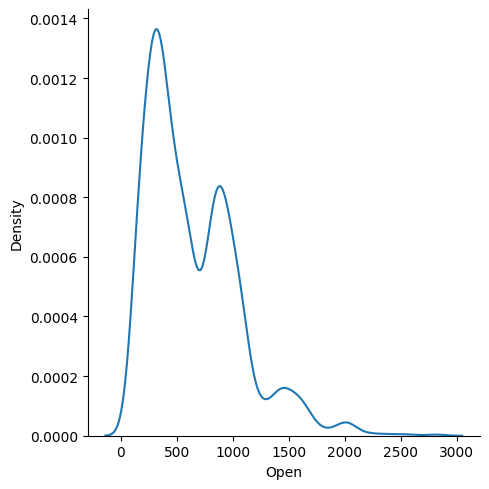

In [20]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'VWAP'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>,
        <Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>],
       [<Axes: title={'center': '%Deliverble'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

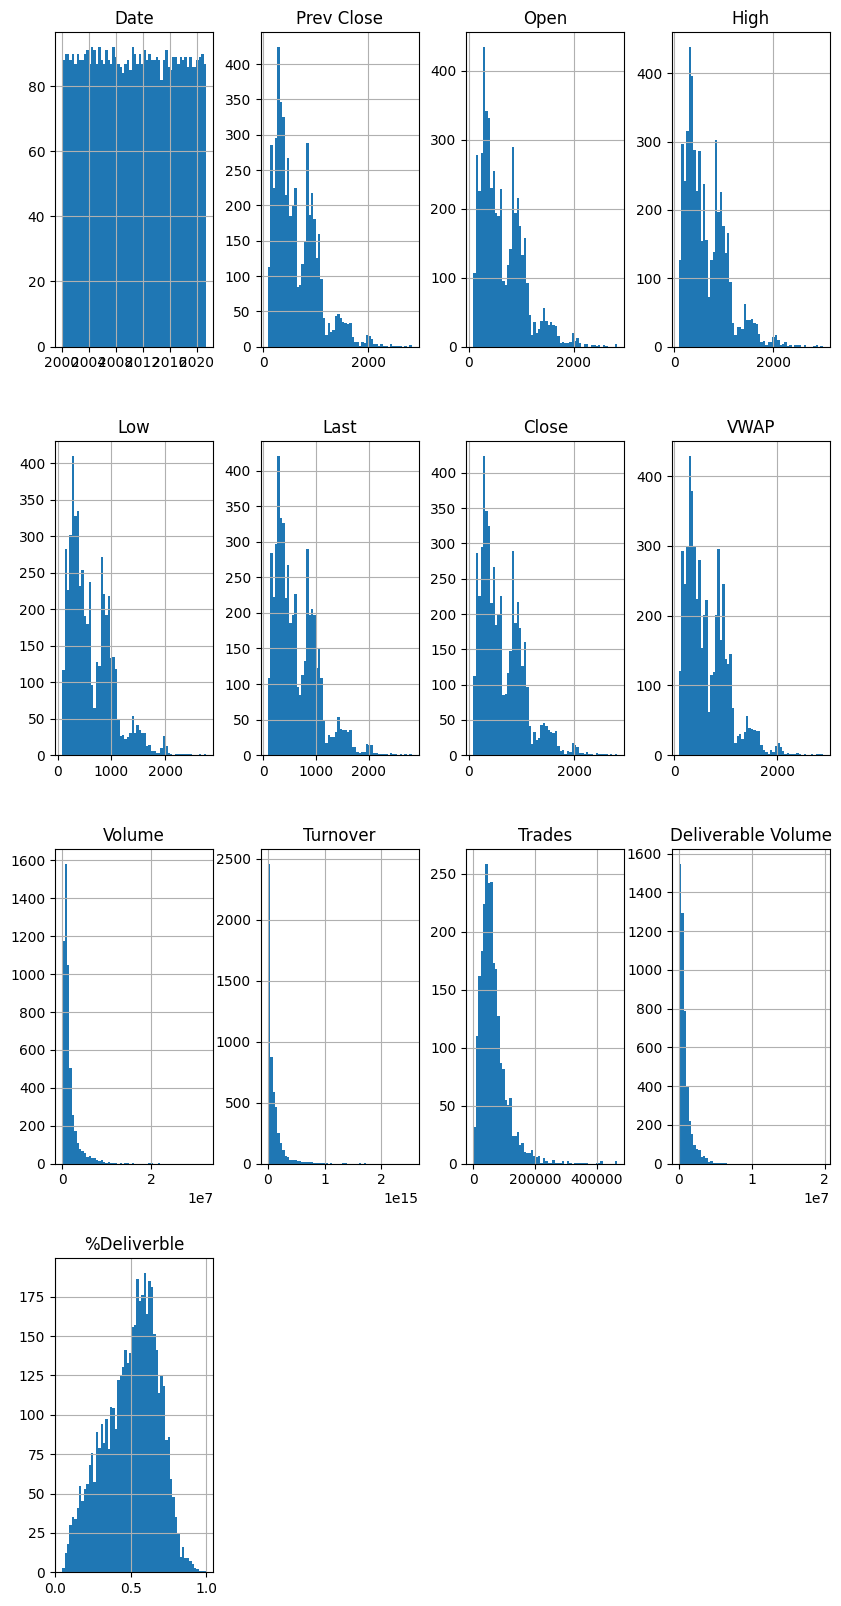

In [24]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

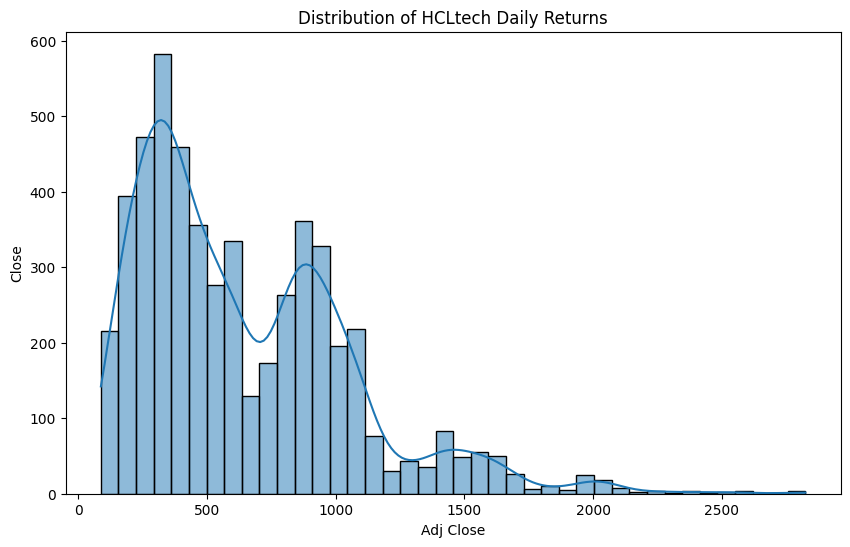

In [25]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of HCLtech Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

In [26]:
# Plot HCLtech High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='HCLtech '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

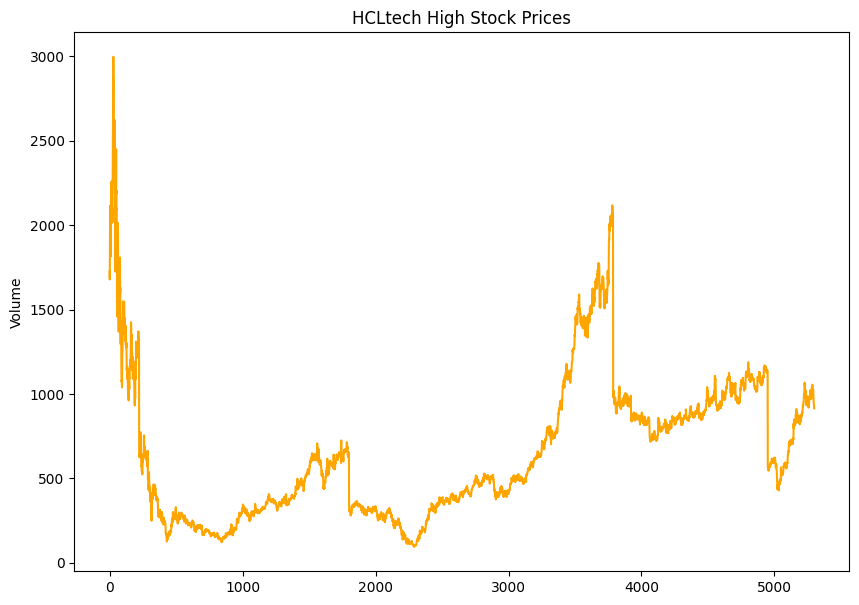

In [27]:
volume_analysis(df,'High')

In [28]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [29]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

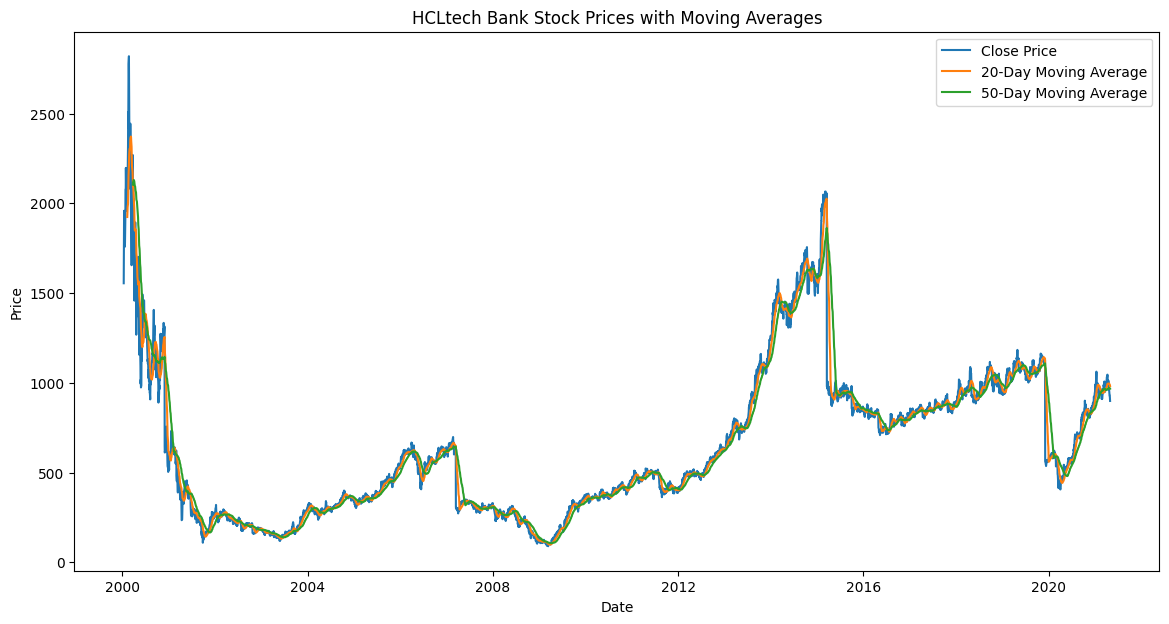

In [30]:
# Calculate and plot moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day Moving Average')
plt.plot(df['MA50'], label='50-Day Moving Average')
plt.title('HCLtech Bank Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Step 3: split the dataset into training and testing sets**

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
# Check if 'Date' is the index
if 'Date' in df.index.names:
    # Reset the index to bring 'Date' back as a column
    df.reset_index(inplace=True)

# Now you can safely convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
# Use 'Close' price as the target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4240, 4), (1060, 4), (4240,), (1060,))

**Step 4: Implementing the Models**

**Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [40]:
mse_lr, r2_lr

(85.85824440488324, 0.9995234430018995)

**Support Vector Machines (SVM)**

In [41]:
from sklearn.svm import SVR

In [42]:
# Preprocess the data by scaling
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVR()

In [44]:
# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

mse_svm, r2_svm

(44790.60199757626, 0.7513893397304855)

**K-Means Clustering**

In [45]:
from sklearn.cluster import KMeans

In [47]:
# Use only 'Close' prices for clustering
df_clustering = df[['Close']]

# Train the model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


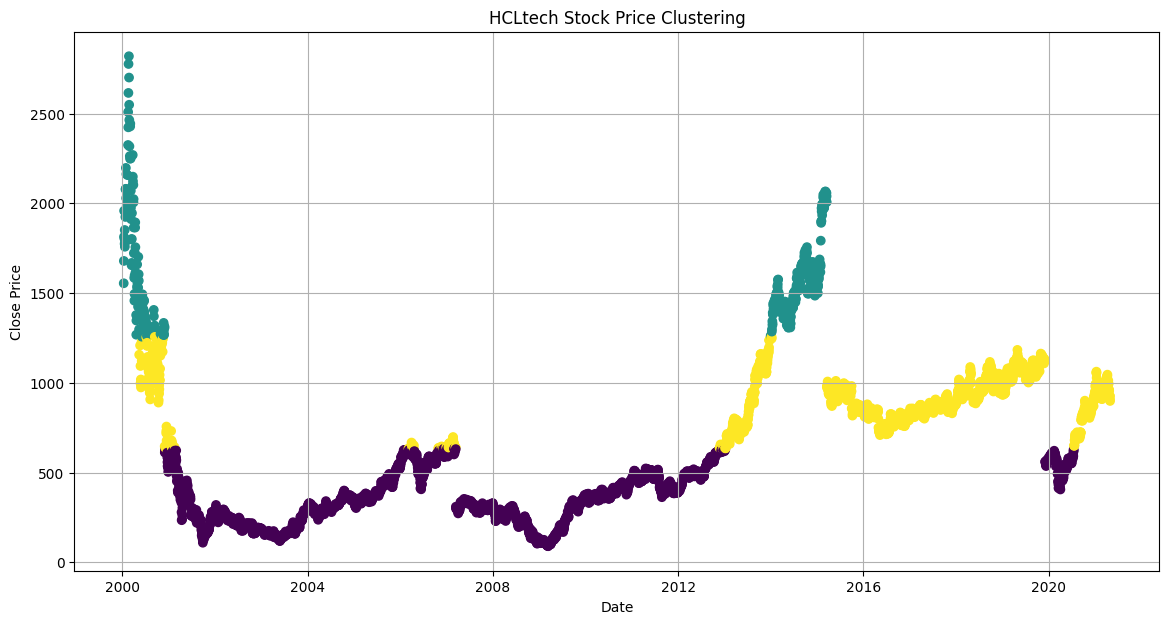

In [49]:
# Visualize the clusters
plt.figure(figsize=(14,7))
plt.scatter(df['Date'], df['Close'], c=df['Cluster'], cmap='viridis')
plt.title('HCLtech Stock Price Clustering')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [50]:
df['Cluster'].value_counts()

Cluster
0    3096
2    1777
1     427
Name: count, dtype: int64

**Compile all results and compare the performance of the models**

In [51]:
results = {
    'Linear Regression': {'MSE': mse_lr, 'R2': r2_lr},
    'SVM': {'MSE': mse_svm, 'R2': r2_svm}
}

results

{'Linear Regression': {'MSE': 85.85824440488324, 'R2': 0.9995234430018995},
 'SVM': {'MSE': 44790.60199757626, 'R2': 0.7513893397304855}}